# Student: Amira KRAM, IDTW

In [1]:
import re
import string
import nltk
import pandas as pd
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter 
from nltk.stem.isri import ISRIStemmer
from farasa.stemmer import FarasaStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.metrics import classification_report
from keras import layers, models, optimizers
import sklearn.metrics as metrics 

# Pre-processing

In [8]:
import pandas as pd
texts = pd.read_csv('data.csv')

In [9]:
texts.shape

(100, 3)

In [10]:
texts = texts.iloc[:,1:3]

In [11]:
texts.head()

transcript    class
0  السلام عليكم الحقيقه رايت مجتمعنا يمشي في غلط ...  hateful
1  انا اصبحت الفيديوهات اقبل العيد  اردت اسجل فيد...  hateful
2  في تصريحات لشبكه اس بي اس تلفزيونيا المرشح الج...  hateful
3  يقرا على مساواه ويراها شعار لا اكثر في العراق ...  hateful
4  يقول ان يستمر هذا الحوار بين رجلين مسلم والمال...  hateful

In [12]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text 

In [13]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [14]:
def remove_number(text):
    return re.sub(r'\d+', '', text)

In [15]:
stopwords_list = stopwords.words('arabic')

In [16]:
print(stopwords_list)

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [17]:
stopwords_list = ' '.join([str(elem) for elem in stopwords_list]) 
stopwords_list = normalize_arabic(stopwords_list)
stopwords_list = word_tokenize(stopwords_list)
stopwords_list

['اذ',
 'اذا',
 'اذما',
 'اذن',
 'اف',
 'اقل',
 'اكثر',
 'الا',
 'الا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'الي',
 'اليك',
 'اليكم',
 'اليكما',
 'اليكن',
 'ام',
 'اما',
 'اما',
 'اما',
 'ان',
 'ان',
 'انا',
 'انا',
 'انت',
 'انتم',
 'انتما',
 'انتن',
 'انما',
 'انه',
 'اني',
 'اني',
 'اه',
 'اها',
 'او',
 'اولاء',
 'اولئك',
 'اوه',
 'اي',
 'اي',
 'ايها',
 'اي',
 'اين',
 'اين',
 'اينما',
 'ايه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلي',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمه',
 'حاشا',
 'حبذا',
 'حتي',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوي',
 'شتان',
 'عدا',
 'عسي',
 'عل'

In [18]:
def processPost(text): 

    # normalization 
     text= normalize_arabic(text)
     
    # remove numbers
     text = remove_number(text)
    # remove repeated letters
     text = remove_repeating_char(text)
    #jjklmlkjjklml

    #kjn,kl
    
    
     return text

In [19]:
texts["transcript"] = texts["transcript"].apply(lambda x: processPost(x)) # apply used to call the method processpost

In [20]:
texts["transcript"].head()

0    السلام عليكم الحقيقه رايت مجتمعنا يمشي في غلط ...
1    انا اصبحت الفيديوهات اقبل العيد اردت اسجل فيدي...
2    في تصريحات لشبكه اس بي اس تلفزيونيا المرشح الج...
3    يقرا علي مساواه ويراها شعار لا اكثر في العراق ...
4    يقول ان يستمر هذا الحوار بين رجلين مسلم والمال...
Name: transcript, dtype: object

In [21]:
stemmer = FarasaStemmer()
texts["transcript"] = texts["transcript"].apply(stemmer.stem)

In [22]:
texts["transcript"]

0     سلام على حقيقه رايت مجتمع مشى في غلط بعض من ما...
1     أنا أصبح فيديو أقبل عيد أراد أسجل فيديو لا رد ...
2     في تصريح شبك اس بي اس تلفزيوني مرشح جمهوري مست...
3     أقر علي مساوا رأى شعار لا أكثر في عراق ثم نظر ...
4     قال ان استمر هذا حوار بين رجل مسلم مال متطرف ي...
                            ...                        
95    اله وفق يسعدك دعاء خير شخص ما اليس ذلك طيب هل ...
96    اما ان حماس مثل كما قال إسلام سياسي ان إسلام ع...
97    كل عرف ان حماس فتح معركه هذا سب بسيط خالص حتي ...
98    خبر القي من ألقي سمع احضر حجر ارايتم بشر أعطى ...
99    هل علي طار منافس سباق من هو منافس فنان سوري من...
Name: transcript, Length: 100, dtype: object

In [23]:
texts["transcript"] = texts["transcript"].apply(lambda x: processPost(x))

In [24]:
texts["transcript"]

0     سلام علي حقيقه رايت مجتمع مشي في غلط بعض من ما...
1     انا اصبح فيديو اقبل عيد اراد اسجل فيديو لا رد ...
2     في تصريح شبك اس بي اس تلفزيوني مرشح جمهوري مست...
3     اقر علي مساوا راي شعار لا اكثر في عراق ثم نظر ...
4     قال ان استمر هذا حوار بين رجل مسلم مال متطرف ي...
                            ...                        
95    اله وفق يسعدك دعاء خير شخص ما اليس ذلك طيب هل ...
96    اما ان حماس مثل كما قال اسلام سياسي ان اسلام ع...
97    كل عرف ان حماس فتح معركه هذا سب بسيط خالص حتي ...
98    خبر القي من القي سمع احضر حجر ارايتم بشر اعطي ...
99    هل علي طار منافس سباق من هو منافس فنان سوري من...
Name: transcript, Length: 100, dtype: object

In [25]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
texts["transcript"] = texts["transcript"].apply(tokenizer.tokenize)

In [26]:
texts["transcript"].head()

0    [سلام, علي, حقيقه, رايت, مجتمع, مشي, في, غلط, ...
1    [انا, اصبح, فيديو, اقبل, عيد, اراد, اسجل, فيدي...
2    [في, تصريح, شبك, اس, بي, اس, تلفزيوني, مرشح, ج...
3    [اقر, علي, مساوا, راي, شعار, لا, اكثر, في, عرا...
4    [قال, ان, استمر, هذا, حوار, بين, رجل, مسلم, ما...
Name: transcript, dtype: object

In [27]:
print(len(stopwords_list))

248


In [28]:
texts["transcript"]= texts["transcript"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [29]:
texts["transcript"].head()

0    [سلام, حقيقه, رايت, مجتمع, مشي, غلط, يجي, احد,...
1    [اصبح, فيديو, اقبل, عيد, اراد, اسجل, فيديو, رد...
2    [تصريح, شبك, اس, اس, تلفزيوني, مرشح, جمهوري, م...
3    [اقر, مساوا, راي, شعار, عراق, نظر, سالم, شعبان...
4    [قال, استمر, حوار, رجل, مسلم, مال, متطرف, يهاج...
Name: transcript, dtype: object

In [30]:
all_words = [word for tokens in texts["transcript"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in texts["transcript"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))                               

15023 words total, with a vocabulary size of 4322
Max sentence length is 364


In [31]:
counter = Counter(all_words)

In [32]:
counter.most_common(40)

[('ل', 200),
 ('قال', 190),
 ('و', 155),
 ('اله', 133),
 ('عني', 110),
 ('يوم', 80),
 ('دوله', 64),
 ('مثل', 62),
 ('شيء', 52),
 ('نفس', 51),
 ('كثير', 50),
 ('قبل', 49),
 ('عمل', 48),
 ('حيوان', 45),
 ('واحد', 45),
 ('ب', 44),
 ('ميز', 43),
 ('بلد', 43),
 ('رئيس', 43),
 ('عربي', 42),
 ('رجل', 39),
 ('عام', 37),
 ('سلام', 36),
 ('امكن', 36),
 ('فلسطين', 35),
 ('عالم', 35),
 ('الان', 35),
 ('سب', 34),
 ('شخص', 33),
 ('اسم', 33),
 ('ثاني', 33),
 ('حق', 33),
 ('عشر', 33),
 ('اول', 33),
 ('احد', 32),
 ('لان', 32),
 ('شعب', 32),
 ('اخر', 32),
 ('ملك', 31),
 ('مسلم', 30)]

In [33]:
n = texts[texts['class'] == 'normal'] 
h = texts[texts['class'] == 'hateful'] 
all_hate_words = [word for tokens in h["transcript"] for word in tokens]
all_normal_words = [word for tokens in n["transcript"] for word in tokens]
print(" hate words total:", len(all_hate_words))
print("normal words total:", len(all_normal_words))

 hate words total: 5706
normal words total: 9317


number of normal videos 50
number of hateful videos 50


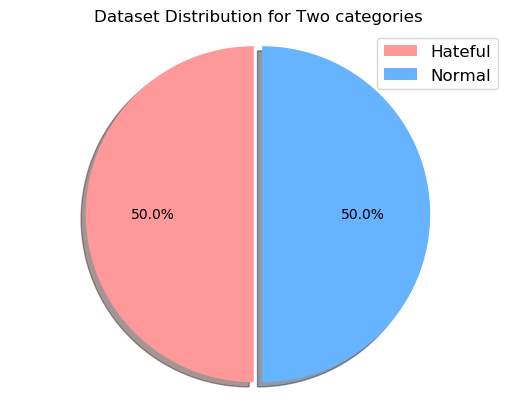

In [34]:
import matplotlib.pyplot as plt 
# number of videos in each category
print("number of normal videos", len(texts[texts['class'] == 'normal' ]))
print("number of hateful videos", len(texts[texts['class'] == 'hateful' ]))
labels = 'Hateful', 'Normal'
sizes = [len(texts[texts['class'] == 'normal' ]), len(texts[texts['class'] == 'hateful' ])]
colors = ['#ff9999','#66b3ff'] # pink and blue 
explode = (0.03, 0.02) 
plt.pie(sizes, explode=explode,  colors=colors, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.axis('equal')#labels=labels,
plt.title("Dataset Distribution for Two categories")
plt.legend(labels,prop={'size': 12},
          loc="best")# best upper right
plt.plot()  
plt.show()  

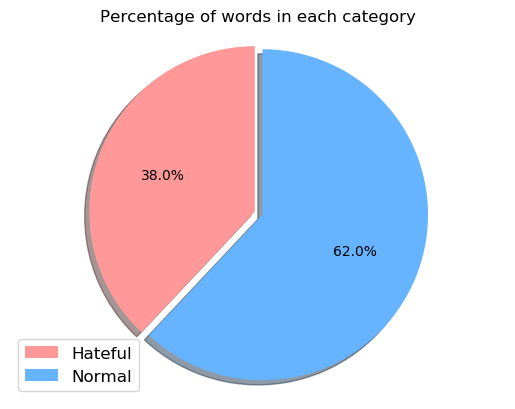

In [35]:
labels = 'Hateful', 'Normal'
sizes = [len(all_hate_words), len(all_normal_words)]
colors = ['#ff9999','#66b3ff'] # pink and blue
explode = (0.03, 0.02) 
plt.pie(sizes, explode=explode,  colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')#labels=labels,
plt.title("Percentage of words in each category")
plt.legend(labels,prop={'size': 12},
          loc="best")# best upper right
plt.plot()
plt.show() 

####  split the dataset into training and testing datasets

In [36]:
import numpy as np

In [37]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(texts['class'])
texts['class'] = encpro

In [38]:
# split the dataset into training and testing datasets  
x_train, x_test, y_train, y_test = train_test_split(texts['transcript'], texts['class'], test_size=0.2, random_state=7)     

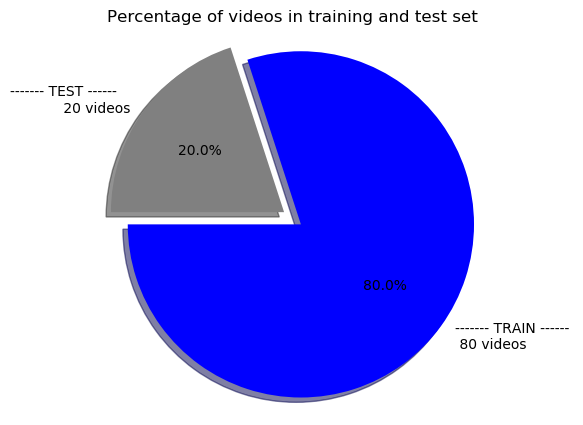

In [39]:
tr = '------- TRAIN ------ \n %d videos '%len(x_train.index)
ts= '------- TEST ------   \n %d videos'%len(x_test.index)
labels =tr ,ts 
sizes = [len(x_train.index),len(x_test.index)]
colors = ['blue','gray']
explode = (0.06, 0.06) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Percentage of videos in training and test set")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

# Machine Learning

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer
# create a count vectorizer object 
cv = CountVectorizer(max_features=4000) 

# transform the training and testing data using count vectorizer object with unigrams (1,1) 
x_train_count =  cv.fit_transform(x_train.astype('str'))
x_test_count =  cv.transform(x_test.astype('str'))

tfidf_tr = TfidfTransformer()
x_train_count_tfidf = tfidf_tr.fit_transform(x_train_count)
x_test_count_tfidf = tfidf_tr.transform(x_test_count)

# tf_idf
tfidf_vect = TfidfVectorizer()  
x_train_tfr = tfidf_vect.fit_transform(x_train.astype('str'))
x_test_tft =  tfidf_vect.transform(x_test.astype('str'))

In [66]:
def classifierModel(classifier, Xtrain, Ytrain, Xtest):
    classifier.fit(Xtrain, Ytrain)
    predictions = classifier.predict(Xtest)
    print("\nAccuracy : ",  Decimal(accuracy_score(predictions, y_test)))
    
    target_names = ['class 0', 'class 1']
    print(classification_report(y_test, predictions))

In [67]:
from decimal import *
print("\nNaive Bayes with Count Vectors: ")
classifierModel(MultinomialNB(), x_train_count, y_train, x_test_count)

print("\nNaive Bayes with Count Vectors + TF-IDF: ")
classifierModel(MultinomialNB(), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nNaive Bayes with TF_IDF: ")
classifierModel(MultinomialNB(), x_train_tfr, y_train, x_test_tft)



Naive Bayes with Count Vectors: 

Accuracy :  0.90000000000000002220446049250313080847263336181640625
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20


Naive Bayes with Count Vectors + TF-IDF: 

Accuracy :  0.8000000000000000444089209850062616169452667236328125
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.70      0.88      0.78         8

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20


Naive Bayes with TF_IDF: 

Accuracy :  0.8000000000000000444089209850062616169452667236328125
              precision    recall  f1

In [68]:
print("\nLinearSVM with Count Vectors: ")
classifierModel(SVC(kernel='linear',C=2,max_iter=30), x_train_count, y_train, x_test_count)

print("\nLinearSVM with Count Vectors + TF-IDF: ")
classifierModel(SVC(kernel='linear'), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nNaive Bayes with TF_IDF: ")
classifierModel(SVC(kernel='linear'), x_train_tfr, y_train, x_test_tft)



LinearSVM with Count Vectors: 

Accuracy :  0.84999999999999997779553950749686919152736663818359375
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20


LinearSVM with Count Vectors + TF-IDF: 

Accuracy :  0.9499999999999999555910790149937383830547332763671875
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.88      0.93         8

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20


Naive Bayes with TF_IDF: 

Accuracy :  0.9499999999999999555910790149937383830547332763671875
              precision    recall  f1-sco

C:\Users\Amira-pc\Anaconda3\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [69]:
print("\nRandom Forrest Classifier with Count Vectors: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_count, y_train, x_test_count)

print("\nRandom Forrest Classifier with Count Vectors + TF-IDF: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nNaive Bayes with TF_IDF: ")
classifierModel(RandomForestClassifier(random_state=40,n_estimators=1024), x_train_tfr, y_train, x_test_tft)




Random Forrest Classifier with Count Vectors: 

Accuracy :  0.84999999999999997779553950749686919152736663818359375
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.62      0.77         8

    accuracy                           0.85        20
   macro avg       0.90      0.81      0.83        20
weighted avg       0.88      0.85      0.84        20


Random Forrest Classifier with Count Vectors + TF-IDF: 

Accuracy :  0.90000000000000002220446049250313080847263336181640625
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20


Naive Bayes with TF_IDF: 

Accuracy :  0.90000000000000002220446049250313080847263336181640625
       

In [70]:
print("\nLogistic Regression with Count Vectors: ")
classifierModel(LogisticRegression() , x_train_count, y_train, x_test_count)

print("\nLogistic Regression with Count Vectors + TF-IDF: ")
classifierModel(LogisticRegression() , x_train_count_tfidf, y_train, x_test_count_tfidf)

print("\nLogistic Regression with TF_IDF: ")
classifierModel(LogisticRegression() , x_train_tfr, y_train, x_test_tft)




Logistic Regression with Count Vectors: 

Accuracy :  0.84999999999999997779553950749686919152736663818359375
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.86      0.75      0.80         8

    accuracy                           0.85        20
   macro avg       0.85      0.83      0.84        20
weighted avg       0.85      0.85      0.85        20


Logistic Regression with Count Vectors + TF-IDF: 

Accuracy :  0.75
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.64      0.88      0.74         8

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20


Logistic Regression with TF_IDF: 

Accuracy :  0.75
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
    

[80, 95, 90, 75]


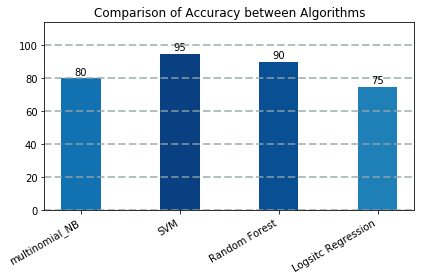

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
idx = range(4)
values = [80, 95, 90, 75]
data_hight_normalized = [x / max(values) for x in values]
print( values)
labels = ['multinomial_NB',  'SVM', 'Random Forest', 'Logsitc Regression']
fig, ax = plt.subplots(1)
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
plt.title("Comparison of Accuracy between Algorithms")
# Automatically align and rotate tick labels:
fig.autofmt_xdate()
bars = plt.bar(idx, values, align='center',color=colors, width = 0.4)
plt.xticks(idx, labels)
plt.tight_layout()
# Add text labels to the top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
autolabel(bars)
plt.ylim([0, max(values) * 1.2])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

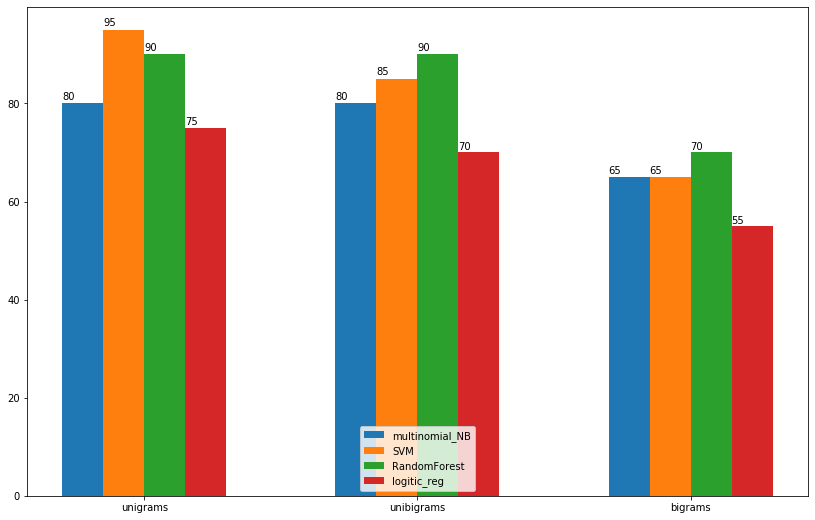

In [80]:
def subcategorybar(X, vals,als, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    plt.figure(figsize=(14,9))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge")
        for j in _X:
            plt.text([_X - width/2. + i/float(n)*width][0][j],vals[i][j]+0.01*vals[i] 
                     [j],str(als[i][j]))
    plt.xticks(_X, X)

### data
X = ['unigrams','unibigrams','bigrams']

data = [[80, 80, 65],
  [95, 85, 65],
  [90, 90, 70],
  [75, 70, 55]
  ]

subcategorybar(X, data,data,width=0.6)
plt.legend(['multinomial_NB',  'SVM', 'RandomForest', 'logitic_reg'], loc="lower center" )
#plt.grid()
plt.show()


# Deep Learning 

In [40]:
from keras.preprocessing import sequence

In [41]:
from keras.preprocessing.text import Tokenizer
max_review_length = 100              
tok = Tokenizer(num_words=5000, lower=True)        
tok.fit_on_texts(list(x_train.astype('str')))
x_train = tok.texts_to_sequences(x_train.astype('str')) 
x_test = tok.texts_to_sequences(x_test.astype('str'))  

In [42]:
# truncate and pad input sequences
max_review_length = 300
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length) 
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length) 

In [45]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

## LSTM Model

In [185]:
# LSTM with dropout= 0.2 
#Accuracy: 0.900000
#Precision: 1.000000
#Recall: 0.750000
#F1 score: 0.857143

# create the model
top_words = 5000
from keras.optimizers import Adam
embedding_vecor_length = 100
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=300))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
history = model.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))
# Final evaluation of the model                     
scores = model.evaluate(x_test, y_test, verbose=0)        
print("Accuracy: %.2f%%" % (scores[1]*100))                            

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_83 (Embedding)     (None, 300, 100)          500000    
_________________________________________________________________
lstm_84 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
2/2 [==============================] - 6s 1s/step - loss: 0.6937 - accuracy: 0.4729 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 3s 834ms/step - loss: 0.6872 - accuracy: 0.5865 - val_loss: 0.6902 - val_accuracy: 0.4000
Epoch 3/20
2/2 [==============================] - 2s 804ms/step - loss: 0.6798 - accuracy: 0.64

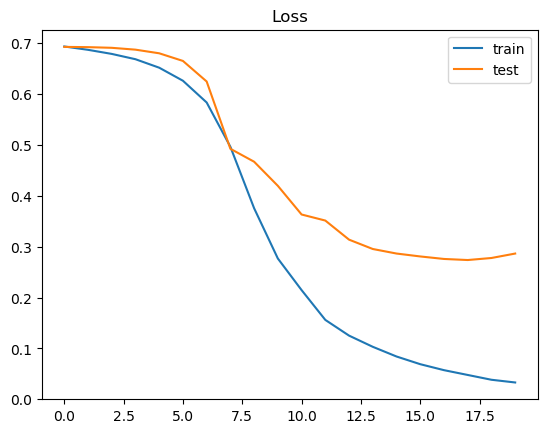

In [128]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

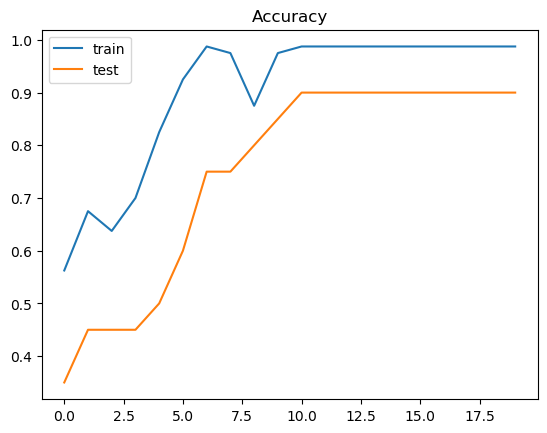

In [129]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [156]:
yh = model.predict_classes(x_test, verbose=0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yh)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yh)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yh)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yh)
print('F1 score: %f' % f1)

Accuracy: 0.900000
Precision: 1.000000
Recall: 0.750000
F1 score: 0.857143


## LSTM + CNN

In [73]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# create the model

top_words = 5000
from keras.optimizers import Adam
embedding_vecor_length = 100
import time
start = time.time()
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=300))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())     
history =model.fit(x_train, y_train, epochs=20, batch_size=16,validation_data=(x_test, y_test))
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)    
end = time.time()
print(end - start)
print("Accuracy: %.2f%%" % (scores[1]*100))    

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 300, 100)          500000    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 300, 32)           9632      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 150, 32)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 101       
Total params: 562,933
Trainable params: 562,933
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5/5 [==============================] - 4s 400ms/step - loss: 0.6935 - accuracy: 0.5691 - val_loss

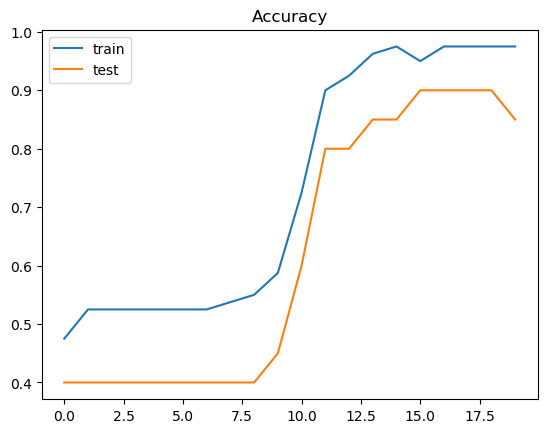

In [138]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

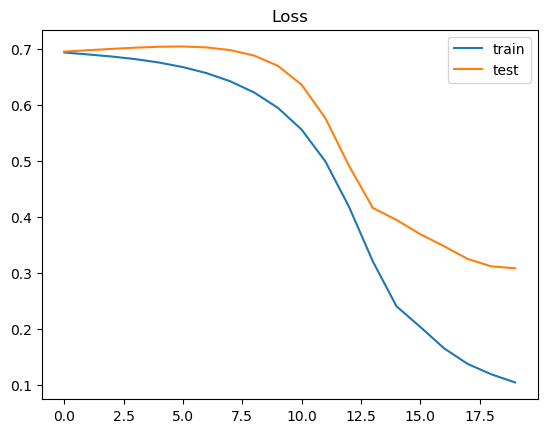

In [139]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [56]:
yh = model.predict_classes(x_test, verbose=0)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yh)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yh)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yh)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yh)
print('F1 score: %f' % f1)

Accuracy: 0.850000
Precision: 0.777778
Recall: 0.875000
F1 score: 0.823529


[90, 85, 85]


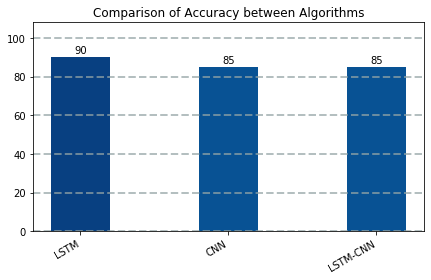

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
idx = range(3)
values = [90, 85, 85]
data_hight_normalized = [x / max(values) for x in values]
print( values)
labels = ['LSTM',  'CNN', 'LSTM-CNN']
fig, ax = plt.subplots(1)
my_cmap = plt.cm.get_cmap('GnBu')
colors = my_cmap(data_hight_normalized)
plt.title("Comparison of Accuracy between Algorithms")
# Automatically align and rotate tick labels:
fig.autofmt_xdate()
bars = plt.bar(idx, values, align='center',color=colors, width = 0.4)
plt.xticks(idx, labels)
plt.tight_layout()
# Add text labels to the top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
autolabel(bars)
plt.ylim([0, max(values) * 1.2])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()